In [2]:
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy import array
from numpy.random import rand
from numpy.random import randn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

num_inputs = 2 # for discriminator
latent_dim = 5 # of generator

In [3]:
# define and use the generator model
 
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

def define_discriminator(n_inputs=2):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input
 
# use the generator to generate n fake examples and plot the results
def generate_fake_samples_from_generator_and_show(generator, latent_dim, n):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X = generator.predict(x_input)
	# plot the results
	pyplot.scatter(X[:, 0], X[:, 1])
	pyplot.show()

# generate n fake samples with class labels
def generate_bad_fake_samples(n):
	# generate inputs in [-1, 1]
	X1 = -2 + rand(n) * 4
	# generate outputs in [-1, 1]
	X2 = -2 + rand(n) * 4
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = zeros((n, 1))
	return X, y
 
# generate n real samples with class labels
def generate_real_samples(n):
	# generate inputs in [-0.5, 0.5]
	X1 = rand(n)*2.0 - 1.0
	# generate outputs X^2
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
	# generate class labels
	y = ones((n, 1))
	return X, y
 
# train the discriminator model
def train_discriminator(model, n_epochs=1000, n_batch=128):
	half_batch = int(n_batch / 2)
	# run epochs manually
	for i in range(n_epochs):
		# generate real examples
		X_real, y_real = generate_real_samples(half_batch)
		# update model
		model.train_on_batch(X_real, y_real)
		# generate fake examples
		X_fake, y_fake = generate_bad_fake_samples(half_batch)
		# update model
		model.train_on_batch(X_fake, y_fake)
		# evaluate the model
		_, acc_real = model.evaluate(X_real, y_real, verbose=0)
		_, acc_fake = model.evaluate(X_fake, y_fake, verbose=0)
	print(f"Accuracy on Real Samples: {acc_real}, for fake samples {acc_fake}")
    
# visualize discriminator knowledge
def show_iteration(model,weights):
    model.set_weights(weights)
    n = 1000
    s_x, s_y = generate_bad_fake_samples(n)
    s_o = d.predict(s_x)
    s_o = s_o.reshape(n)*100
    f = array([x[0] for x in s_x])
    f.reshape(n,)
    #n range(len(s_x)) if s_o[x] < 0.9]
    #f.reshape(100,1)
    pyplot.scatter(s_x[:, 0], s_x[:, 1],c=s_o)
    pyplot.show()

def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

def train_gan(model,n_batch):
	x_gan = generate_latent_points(n=n_batch,latent_dim=latent_dim)
	# create inverted labels for the fake samples
	y_gan = ones((n_batch, 1))
	print(x_gan.shape)
	model.train_on_batch(x_gan, y_gan)

In [24]:
# Build Generator
g = define_generator(latent_dim)

In [25]:
# Build Discriminator
d = define_discriminator(num_inputs)

In [26]:
# Build GAN
gan = define_gan(g,d)

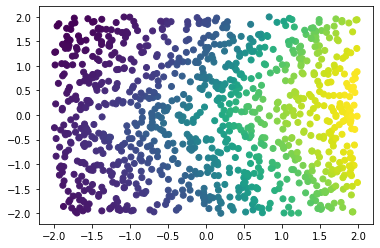

In [27]:
# Visualize generator and discriminator knowledge
generate_fake_samples_from_generator_and_show(g, latent_dim, 1000)
show_iteration(d,d.get_weights())

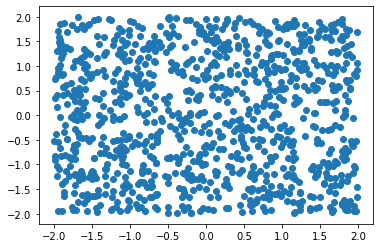

In [22]:
# Visualize the good learning and bad learning samples
n = 1000
(s,c) = generate_real_samples(n)
pyplot.scatter(s[:,0],s[:,1])
pyplot.show()
(s,c) = generate_bad_fake_samples(n)
pyplot.scatter(s[:,0],s[:,1])
pyplot.show()


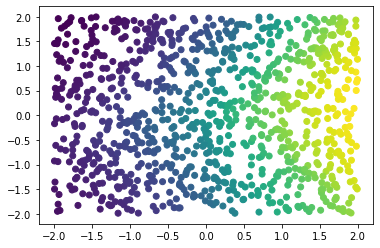

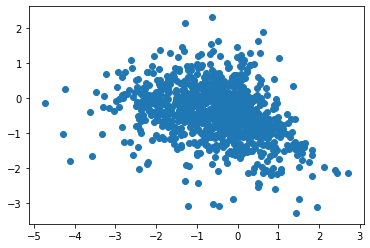

Accuracy on Real Samples: 0.78125, for fake samples 0.875
(200, 5)


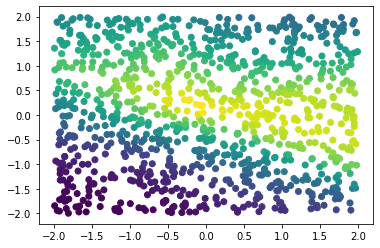

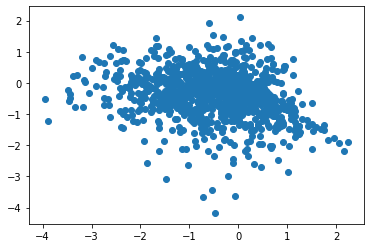

Accuracy on Real Samples: 0.890625, for fake samples 0.921875
(200, 5)


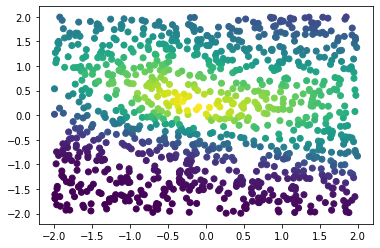

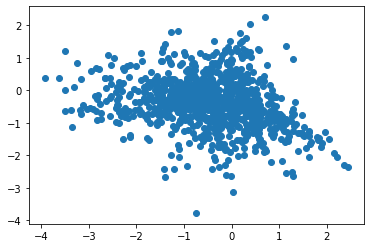

Accuracy on Real Samples: 0.84375, for fake samples 0.828125
(200, 5)


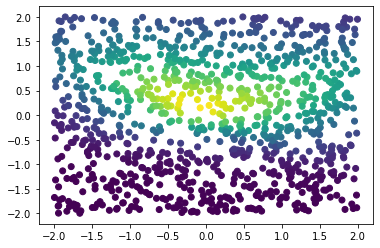

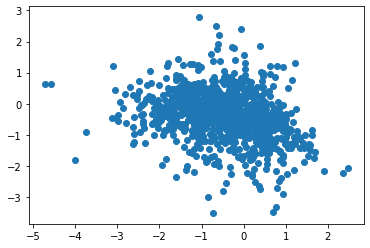

Accuracy on Real Samples: 0.890625, for fake samples 0.859375
(200, 5)


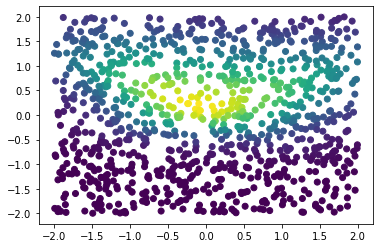

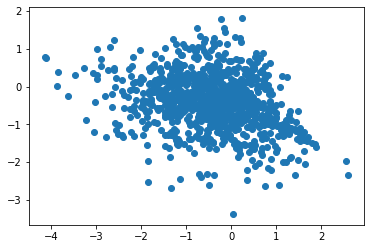

Accuracy on Real Samples: 0.96875, for fake samples 0.828125
(200, 5)


Accuracy on Real Samples: 1.0, for fake samples 0.890625
(200, 5)


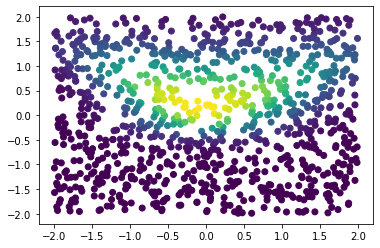

Accuracy on Real Samples: 0.984375, for fake samples 0.875
(200, 5)


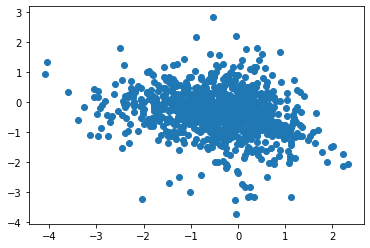

Accuracy on Real Samples: 0.96875, for fake samples 0.796875
(200, 5)


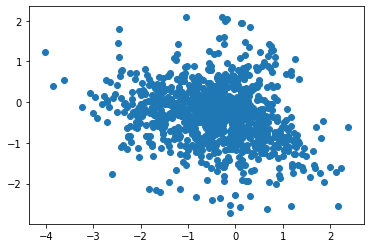

Accuracy on Real Samples: 1.0, for fake samples 0.890625
(200, 5)


Accuracy on Real Samples: 1.0, for fake samples 0.90625
(200, 5)


Accuracy on Real Samples: 1.0, for fake samples 0.890625
(200, 5)


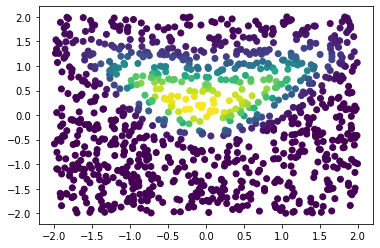

KeyboardInterrupt: 

In [28]:
n = 50
lw = []
for i in range(n):
    epochs = 200
  
    # Visualize disciminiator
    show_iteration(d,d.get_weights())

    # Visualize generator
    generate_fake_samples_from_generator_and_show(g, latent_dim, 1000)
    
    # Train discriminiator
    train_discriminator(d,n_epochs=epochs)
    
    # Train generator
    train_gan(gan, epochs)